In [2]:
import pandas as pd
%pip install networkx
import networkx as nx
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


# Isomorphism and Graph Difference

In [3]:
G1 = nx.read_gexf(path='../Analyses/CO2_emissions_bipartite_1970.gexf')
G2 = nx.read_gexf(path='../Analyses/CO2_emissions_bipartite_2019.gexf')

In [65]:
#dist=nx.optimize_graph_edit_distance(G1, G2)


In [4]:
R = nx.difference(G1, G2)
R.edges()

EdgeView([('ABW', '1.B.2'), ('1.A.1.a', 'ALB'), ('AFG', '2.C'), ('AFG', '3.C.2'), ('ALB', '1.A.5'), ('ALB', '2.A.4'), ('ALB', '2.B'), ('ANT', '1.A.1.bc'), ('ANT', '2.A.4'), ('ARE', '3.C.3'), ('ARG', '1.A.3.c'), ('ARM', '2.A.2'), ('ARM', '2.C'), ('ARM', '3.C.2'), ('ATG', '1.B.2'), ('AZE', '1.A.5'), ('AZE', '2.A.2'), ('BDI', '1.A.1.bc'), ('BDI', '1.B.2'), ('BDI', '2.A.2'), ('BDI', '3.C.3'), ('BEL', '3.C.3'), ('BFA', '1.A.1.bc'), ('BFA', '1.B.2'), ('BFA', '3.C.3'), ('BHS', '1.B.2'), ('BHS', '2.A.1'), ('BHS', '2.A.2'), ('BHS', '3.C.3'), ('BLR', '1.A.5'), ('BLZ', '2.A.2'), ('BLZ', '3.C.3'), ('BMU', '1.B.2'), ('BMU', '3.C.3'), ('BOL', '1.A.5'), ('BOL', '3.C.3'), ('BRB', '3.C.3'), ('BRN', '1.A.5'), ('BWA', '3.C.3'), ('CAF', '1.A.1.bc'), ('CAF', '1.B.2'), ('CAF', '3.C.3'), ('CAN', '1.A.5'), ('CHE', '1.B.1'), ('CHL', '1.A.5'), ('CHL', '2.A.4'), ('COD', '1.A.1.bc'), ('COD', '1.A.5'), ('COD', '1.B.1'), ('COD', '3.C.3'), ('COG', '3.C.3'), ('COL', '1.A.3.c'), ('COL', '2.A.2'), ('COL', '3.C.2'), ('C

In [5]:
print(R)

Graph with 234 nodes and 280 edges


In [6]:
def graphs_equal(graph1, graph2):
    """Check if graphs are equal.
    Equality here means equal as Python objects (not isomorphism).
    Node, edge and graph data must match.
    """
    return (
        graph1.adj == graph2.adj
        and graph1.nodes == graph2.nodes
        and graph1.graph == graph2.graph
    )

In [7]:
graphs_equal(G1,G2)

False

In [ ]:
#nx.graph_edit_distance(G1, G2)

In [21]:
nx.is_isomorphic(G1, G2)

False

In [8]:
GH = nx.compose(G1,G2)

In [59]:
# set edge colors
edge_colors = dict()
for edge in GH.edges():
    if G1.has_edge(*edge):
        if G2.has_edge(*edge):
            edge_colors[edge] = 'lightblue'
            continue
        edge_colors[edge] = 'magenta'
    elif G2.has_edge(*edge):
        edge_colors[edge] = 'green'

# set node colors
G_nodes = set(G1.nodes())
H_nodes = set(G2.nodes())
node_colors = []
for node in GH.nodes():
    if node in G_nodes:
        if node in H_nodes:
            node_colors.append('lightblue')
            continue
        node_colors.append('magenta')
    if node in H_nodes:
        node_colors.append('green')

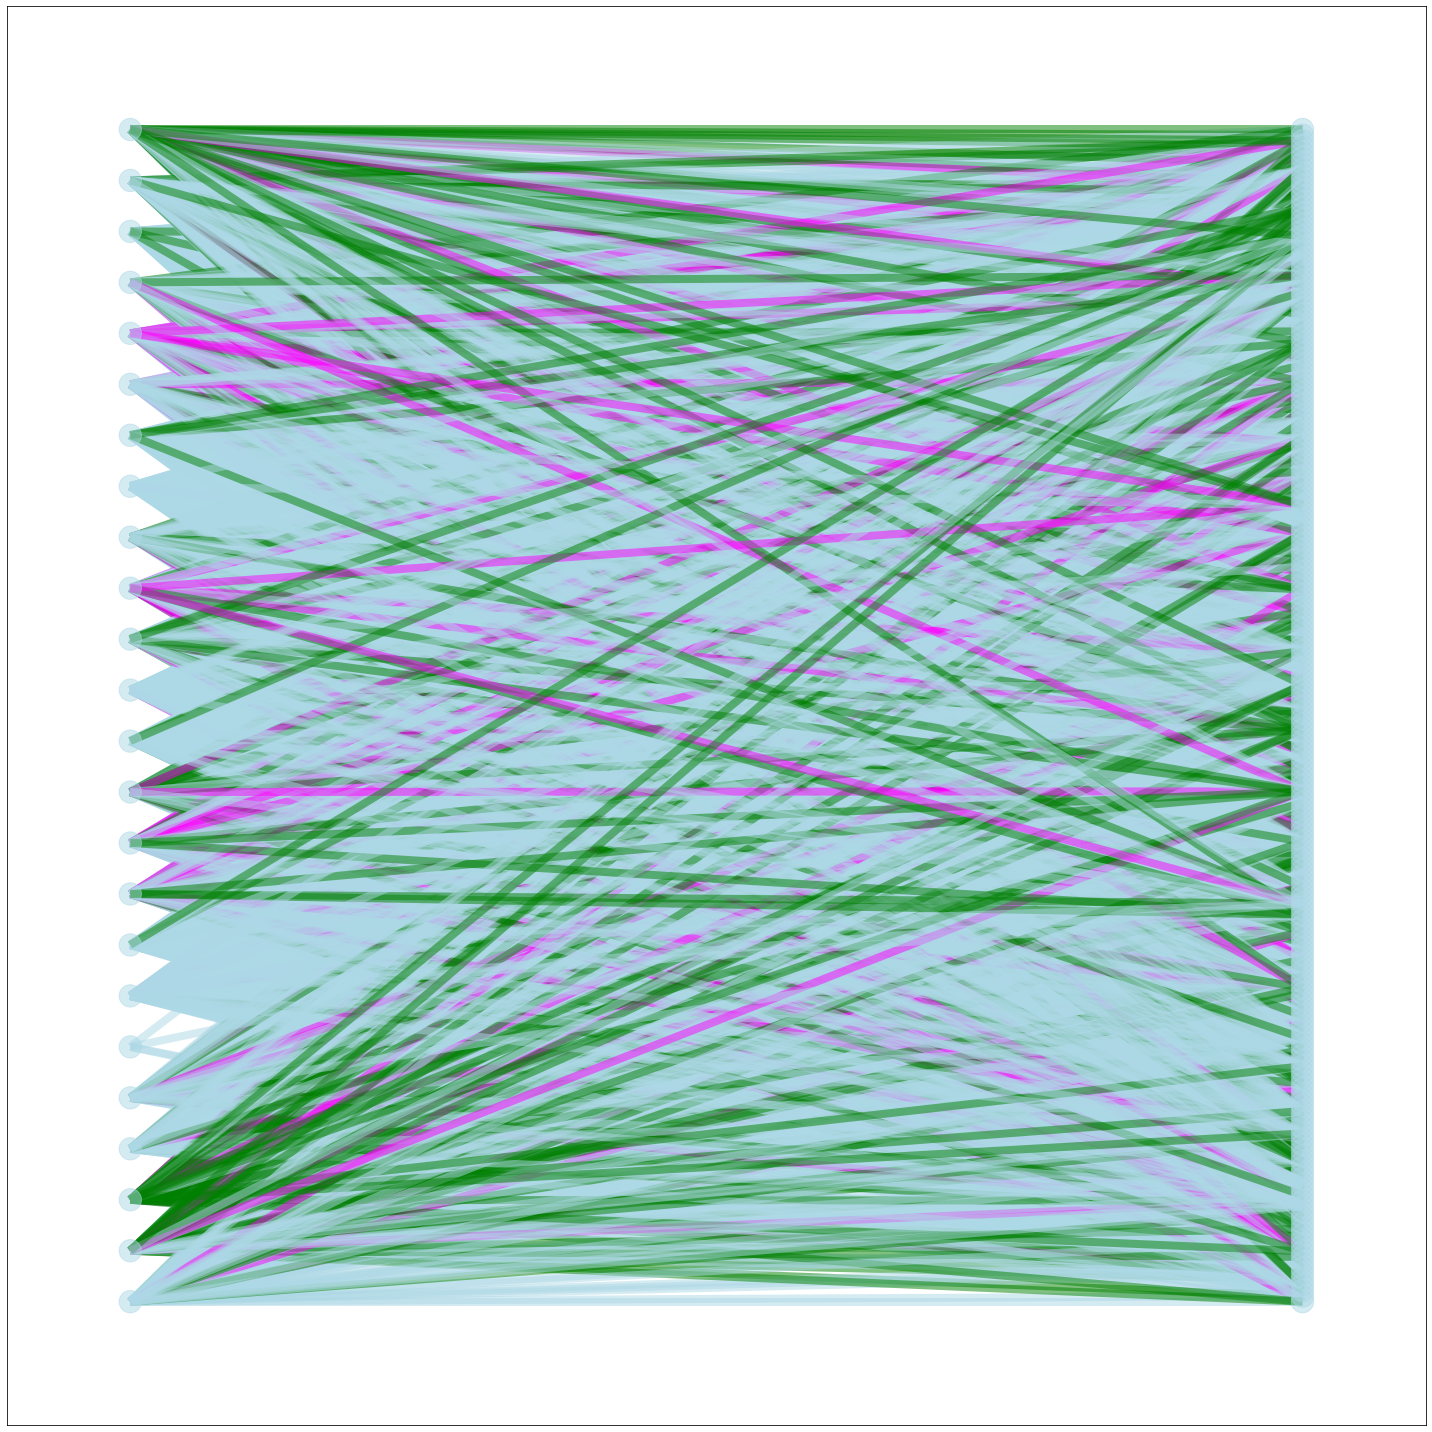

In [64]:
from networkx import bipartite
bottom_nodes, top_nodes = bipartite.sets(GH)
pos = nx.bipartite_layout(GH, top_nodes)
plt.figure(figsize=(20,20))
node_size=100
nx.draw_networkx(GH, pos=pos, nodelist=GH.nodes(),
        node_color=node_colors,
        edgelist=edge_colors.keys(), 
        edge_color=edge_colors.values(),
        node_size=500,
        width=8,alpha=0.5,
        with_labels=False)

# Comparing centrality measures

## 2019

In [81]:
import pandas as pd
%pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
# rename Unnamed: 0
df1 = pd.read_csv('../csv/birank_country2019.csv')
df2 = pd.read_csv('../csv/pagerank_country2019.csv')
df3 = pd.read_csv('../csv/lapl_country_2019.csv')
df4=pd.read_csv('../csv/weight_country_deg2019.csv')


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [82]:
result=pd.merge(df1, df2, on='Country')
result=pd.merge(result, df3, on='Country')
result=pd.merge(result, df4, on='Country')
result

,Unnamed: 0_x,Country,Country_code_A3_birank,Unnamed: 0_y,pagerank,nx_lapl_centr_country,nx_bipartite_weight_deg
0,0,ABW,0.001150,0,0.000751,4.089991e-05,1404.705123
1,1,AFG,0.002103,1,0.000946,2.539731e-04,12215.717086
2,2,AGO,0.003575,2,0.001556,8.630605e-04,51343.735532
3,3,AIA,0.000775,3,0.000715,5.341242e-07,27.579993
4,4,AIR,0.013646,4,0.001349,2.934685e-03,617763.229300
...,...,...,...,...,...,...,...
205,205,WSM,0.000965,205,0.000723,9.419637e-06,416.092691
206,206,YEM,0.002173,206,0.000940,2.448017e-04,12840.573918
207,207,ZAF,0.009358,207,0.012755,1.423798e-02,520574.310447
208,208,ZMB,0.003004,208,0.001368,6.669854e-04,35725.327086


In [83]:
rankings2019=result.drop(columns=['Unnamed: 0_x','Unnamed: 0_y']).sort_values(by="Country_code_A3_birank", ascending=False).head(n=10)
rankings2019.to_csv('../csv/rankings2019.csv')
rankings2019

,Country,Country_code_A3_birank,pagerank,nx_lapl_centr_country,nx_bipartite_weight_deg
36,CHN,0.043130,0.204857,0.612277,1.238974e+07
198,USA,0.029843,0.107397,0.189434,5.647252e+06
90,IND,0.023633,0.077806,0.116881,3.645444e+06
160,RUS,0.018158,0.042837,0.055996,1.917831e+06
165,SEA,0.016480,0.001051,0.003060,6.855904e+05
27,BRA,0.015141,0.019570,0.024103,1.258196e+06
99,JPN,0.013822,0.029829,0.036020,1.196839e+06
4,AIR,0.013646,0.001349,0.002935,6.177632e+05
89,IDN,0.012385,0.018493,0.021450,9.005617e+05
50,DEU,0.011484,0.019007,0.021632,8.108095e+05


In [84]:
countrynames=pd.read_csv('../csv/countrynames.csv')
rankings2019=pd.merge(countrynames,rankings2019, on='Country')
rankings2019
#rankings2019.drop_duplicates().drop(columns='Unnamed: 0').sort_values(by="Country_code_A3_birank", ascending=False).head(n=10)

,Unnamed: 0,Country,Name,Country_code_A3_birank,pagerank,nx_lapl_centr_country,nx_bipartite_weight_deg
0,71,AIR,Int. Aviation,0.013646,0.001349,0.002935,6.177632e+05
1,72,AIR,Int. Aviation,0.013646,0.001349,0.002935,6.177632e+05
2,588,BRA,Brazil,0.015141,0.019570,0.024103,1.258196e+06
3,589,BRA,Brazil,0.015141,0.019570,0.024103,1.258196e+06
4,590,BRA,Brazil,0.015141,0.019570,0.024103,1.258196e+06
...,...,...,...,...,...,...,...
248,4530,USA,United States,0.029843,0.107397,0.189434,5.647252e+06
249,4531,USA,United States,0.029843,0.107397,0.189434,5.647252e+06
250,4532,USA,United States,0.029843,0.107397,0.189434,5.647252e+06
251,4533,USA,United States,0.029843,0.107397,0.189434,5.647252e+06


In [87]:
rankings2019.drop_duplicates().drop(columns='Unnamed: 0').sort_values(by="Country_code_A3_birank", ascending=False).drop_duplicates().head(n=10)

,Country,Name,Country_code_A3_birank,pagerank,nx_lapl_centr_country,nx_bipartite_weight_deg
62,CHN,China,0.043130,0.204857,0.612277,1.238974e+07
250,USA,United States,0.029843,0.107397,0.189434,5.647252e+06
135,IND,India,0.023633,0.077806,0.116881,3.645444e+06
202,RUS,Russian Federation,0.018158,0.042837,0.055996,1.917831e+06
217,SEA,Int. Shipping,0.016480,0.001051,0.003060,6.855904e+05
25,BRA,Brazil,0.015141,0.019570,0.024103,1.258196e+06
179,JPN,Japan,0.013822,0.029829,0.036020,1.196839e+06
0,AIR,Int. Aviation,0.013646,0.001349,0.002935,6.177632e+05
110,IDN,Indonesia,0.012385,0.018493,0.021450,9.005617e+05
72,DEU,Germany,0.011484,0.019007,0.021632,8.108095e+05


In [52]:
df1 = pd.read_csv('../csv/birank_ind2019.csv')
df2 = pd.read_csv('../csv/pagerank_ind2019.csv')
df3 = pd.read_csv('../csv/lapl_ind2019.csv')
df4=pd.read_csv('../csv/weight_ind_deg2019.csv')
dfnames=pd.read_csv('../csv/indnames.csv')
result=pd.merge(df1, df2, on='industry')
result=pd.merge(result, df3, on='industry')
result=pd.merge(result, df4, on='industry')

rankingsInd=result.drop(columns=['Unnamed: 0_x','Unnamed: 0_y']).sort_values(by="ipcc_code_2006_for_standard_report_birank", ascending=False).head(n=10)
rankingsInd.to_csv('../csv/rankings_ind_19.csv')
rankingsInd=pd.merge(rankingsInd, dfnames, on='industry')
rankingsInd=rankingsInd.drop(columns=['Unnamed: 0','industry'])
rankingsInd=rankingsInd.drop_duplicates()
rankingsInd

,ipcc_code_2006_for_standard_report_birank,pagerank,nx_lapl_centr_ind,nx_bipartite_weight_deg,industry_name
0,0.048331,0.280240,0.613052,1.481609e+07,Main Activity Electricity and Heat Production
370,0.037753,0.193115,0.242057,8.203426e+06,Manufacturing Industries and Construction
745,0.034857,0.094550,0.112655,6.214364e+06,Residential and other sectors
1148,0.034653,0.100894,0.123287,6.336626e+06,Road Transportation no resuspension
1420,0.021009,0.039446,0.023653,1.736853e+06,Petroleum Refining - Manufacture of Solid Fuel...
1609,0.020849,0.012167,0.006454,8.663550e+05,Water-borne Navigation
1785,0.019852,0.058349,0.035488,1.538812e+06,Cement production
1949,0.019681,0.017487,0.009528,1.033981e+06,Civil Aviation
2133,0.018444,0.013330,0.005911,1.090839e+06,Emissions from biomass burning
2326,0.015732,0.022791,0.010227,7.262029e+05,Chemical Industry


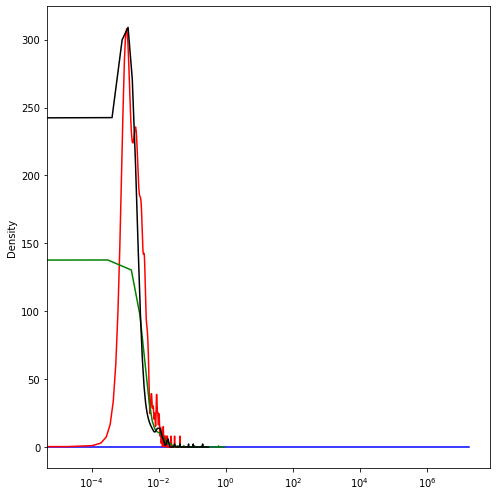

In [35]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
result['nx_bipartite_weight_deg'].plot( kind='kde', ax=ax, logx=True, bw_method=0.05, color='blue')
result['Country_code_A3_birank'].plot( kind='kde', ax=ax, logx=True, bw_method=0.05, color='red')
result['nx_lapl_centr_country'].plot(kind='kde', ax=ax, logx=True, bw_method=0.05, color='green')
result['pagerank'].plot(kind='kde', ax=ax, logx=True, bw_method=0.05, color='black')

plt.show()

## 1970

In [34]:
# rename Unnamed: 0
df1 = pd.read_csv('../csv/birank_country1970.csv')
df2 = pd.read_csv('../csv/pagerank_country1970.csv')
df3 = pd.read_csv('../csv/lapl_country1970.csv')
df4=pd.read_csv('../csv/weight_country_deg1970.csv')


In [35]:
result=pd.merge(df1, df2, on='Country')
result=pd.merge(result, df3, on='Country')
result=pd.merge(result, df4, on='Country')
result

,Unnamed: 0_x,Country,Country_code_A3_birank,Unnamed: 0_y,pagerank,nx_lapl_centr_country,nx_bipartite_weight_deg
0,0,ABW,0.000913,0,0.000718,4.032295e-06,95.065424
1,1,AFG,0.002070,1,0.000776,6.340534e-05,3343.054709
2,2,AGO,0.003820,2,0.001556,9.594362e-04,20393.274067
3,3,AIA,0.000741,3,0.000714,8.720646e-08,2.168292
4,4,ALB,0.002326,4,0.000994,3.326690e-04,6495.392463
...,...,...,...,...,...,...,...
205,205,AIR,0.011599,205,0.001158,1.502340e-03,169300.996600
206,206,PRI,0.001757,206,0.000760,5.264275e-05,2155.933243
207,207,SEA,0.017077,207,0.001159,4.969349e-03,354049.018600
208,208,FRO,0.000764,208,0.000714,3.006874e-10,0.800205


In [36]:
rankings70=result.drop(columns=['Unnamed: 0_x','Unnamed: 0_y']).sort_values(by="Country_code_A3_birank", ascending=False).head(n=10)
rankings70.to_csv('../csv/rankings70.csv')
rankings70

,Country,Country_code_A3_birank,pagerank,nx_lapl_centr_country,nx_bipartite_weight_deg
192,USA,0.042502,0.179652,0.541067,4.954520e+06
155,RUS,0.025506,0.067034,0.119443,1.624575e+06
34,CHN,0.024162,0.084288,0.146586,1.606950e+06
48,DEU,0.020130,0.053451,0.081275,1.096970e+06
95,JPN,0.018808,0.040543,0.059371,8.739406e+05
86,IND,0.017204,0.039904,0.056559,7.610924e+05
207,SEA,0.017077,0.001159,0.004969,3.540490e+05
66,GBR,0.016114,0.033646,0.047003,6.880078e+05
190,UKR,0.015115,0.023001,0.031006,5.152318e+05
64,FRA,0.014112,0.026664,0.035299,5.126641e+05


In [49]:

df1 = pd.read_csv('../csv/birank_ind1970.csv')
df2 = pd.read_csv('../csv/pagerank_ind1970.csv')
df3 = pd.read_csv('../csv/lapl_ind1970.csv')
df4=pd.read_csv('../csv/weight_ind_deg1970.csv')
dfnames=pd.read_csv('../csv/indnames.csv')
result=pd.merge(df1, df2, on='industry')
result=pd.merge(result, df3, on='industry')
result=pd.merge(result, df4, on='industry')

rankingsInd70=result.drop(columns=['Unnamed: 0_x','Unnamed: 0_y']).sort_values(by="ipcc_code_2006_for_standard_report_birank", ascending=False).head(n=10)
rankingsInd70.to_csv('../csv/rankings_ind_70.csv')
rankingsInd70=pd.merge(rankingsInd70, dfnames, on='industry')
rankingsInd70=rankingsInd70.drop(columns=['Unnamed: 0','industry'])
rankingsInd70=rankingsInd70.drop_duplicates()
rankingsInd70

,ipcc_code_2006_for_standard_report_birank,pagerank,nx_lapl_centr_ind,nx_bipartite_weight_deg,industry_name
0,0.044459,0.206766,0.385386,4.926784e+06,Manufacturing Industries and Construction
375,0.043219,0.173387,0.327144,4.589274e+06,Residential and other sectors
778,0.039919,0.187641,0.286387,3.895201e+06,Main Activity Electricity and Heat Production
1148,0.028558,0.120667,0.109801,1.693125e+06,Road Transportation no resuspension
1420,0.021551,0.010240,0.007338,4.437864e+05,Water-borne Navigation
1596,0.020566,0.053649,0.034442,6.874138e+05,Petroleum Refining - Manufacture of Solid Fuel...
1785,0.018834,0.013500,0.006441,4.696228e+05,Emissions from biomass burning
1978,0.018819,0.010089,0.003227,3.079856e+05,Oil and Natural Gas
2252,0.018361,0.021787,0.010824,4.167294e+05,Non-Specified
2520,0.018014,0.025627,0.013727,3.351117e+05,Civil Aviation


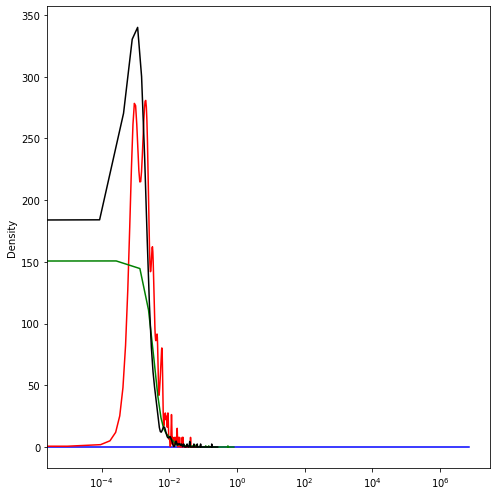

In [39]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
result['nx_bipartite_weight_deg'].plot( kind='kde', ax=ax, logx=True, bw_method=0.05, color='blue')
result['Country_code_A3_birank'].plot( kind='kde', ax=ax, logx=True, bw_method=0.05, color='red')
result['nx_lapl_centr_country'].plot(kind='kde', ax=ax, logx=True, bw_method=0.05, color='green')
result['pagerank'].plot(kind='kde', ax=ax, logx=True, bw_method=0.05, color='black')

plt.show()

# Evolution over years


In [9]:
df90 = pd.read_csv('../data/IEA_EDGAR_CO2_1970-2021_byyear.csv')
df90_filtered= df90.filter(['ipcc_code_2006_for_standard_report','Country_code_A3', 'Y_1990',"Name", "ipcc_code_2006_for_standard_report_name" ])
noNa=df90_filtered.dropna()
df_grouped = noNa.groupby(by=["ipcc_code_2006_for_standard_report",'Country_code_A3',"Name", "ipcc_code_2006_for_standard_report_name" ], as_index=False)['Y_1990'].sum()
df_grouped.to_csv('../csv/1990.csv')
df_grouped.describe()

,Y_1990
count,3.255000e+03
mean,8.468323e+03
std,6.251252e+04
min,3.195960e-07
25%,8.929796e+00
50%,1.517214e+02
75%,1.622432e+03
max,2.048520e+06


In [10]:
df10 = pd.read_csv('../data/IEA_EDGAR_CO2_1970-2021_byyear.csv')
df10_filtered= df10.filter(['ipcc_code_2006_for_standard_report','Country_code_A3', 'Y_2010',"Name", "ipcc_code_2006_for_standard_report_name" ])
noNa=df10_filtered.dropna()
df_grouped10 = noNa.groupby(by=["ipcc_code_2006_for_standard_report",'Country_code_A3',"Name", "ipcc_code_2006_for_standard_report_name" ], as_index=False)['Y_2010'].sum()
df_grouped10.to_csv('../csv/2010.csv')
df_grouped10.describe()

,Y_2010
count,3.336000e+03
mean,1.218544e+04
std,1.052928e+05
min,8.300000e-07
25%,1.056954e+01
50%,2.052066e+02
75%,2.115705e+03
max,3.515152e+06


In [11]:
G = nx.Graph()

# Aggiungiamo i nodi al grafo
for _, row in df_grouped.iterrows():
    country_code = row["Country_code_A3"]
    ipcc_code = row["ipcc_code_2006_for_standard_report"]
    G.add_node(country_code, label=country_code, color="red", bipartite=0, part='accountCountries',country_name=row["Name"]) 
    G.add_node(ipcc_code, label=ipcc_code, color="blue", bipartite=1, part='accountIndustries', industry_name=row['ipcc_code_2006_for_standard_report_name'])        
# Aggiungiamo gli archi al grafo con i pesi basati su "Y_2019"
for _, row in df_grouped.iterrows():
    country_code = row["Country_code_A3"]
    ipcc_code = row["ipcc_code_2006_for_standard_report"]
    weight = row["Y_1990"]
    # Se esiste già un arco tra i due nodi, aggiorna il peso
    if G.has_edge(country_code, ipcc_code):
        G[country_code][ipcc_code]['weight'] += weight
    else:
    
        G.add_edge(country_code, ipcc_code, weight=weight)

In [12]:
df80 = pd.read_csv('../data/IEA_EDGAR_CO2_1970-2021_byyear.csv')
df80_filtered= df10.filter(['ipcc_code_2006_for_standard_report','Country_code_A3', 'Y_1980',"Name", "ipcc_code_2006_for_standard_report_name" ])
noNa=df80_filtered.dropna()
df_grouped80 = noNa.groupby(by=["ipcc_code_2006_for_standard_report",'Country_code_A3',"Name", "ipcc_code_2006_for_standard_report_name" ], as_index=False)['Y_1980'].sum()
df_grouped80.to_csv('../csv/1980.csv')
df_grouped80.describe()

,Y_1980
count,3.264000e+03
mean,7.410677e+03
std,5.289743e+04
min,-3.476000e-08
25%,6.077231e+00
50%,1.223385e+02
75%,1.462219e+03
max,1.561404e+06


In [13]:
df00 = pd.read_csv('../data/IEA_EDGAR_CO2_1970-2021_byyear.csv')
df00_filtered= df10.filter(['ipcc_code_2006_for_standard_report','Country_code_A3', 'Y_2000',"Name", "ipcc_code_2006_for_standard_report_name" ])
noNa=df00_filtered.dropna()
df_grouped00 = noNa.groupby(by=["ipcc_code_2006_for_standard_report",'Country_code_A3',"Name", "ipcc_code_2006_for_standard_report_name" ], as_index=False)['Y_2000'].sum()
df_grouped00.to_csv('../csv/2000.csv')
df_grouped00.describe()

,Y_2000
count,3.282000e+03
mean,9.538336e+03
std,7.356785e+04
min,7.446720e-07
25%,9.470136e+00
50%,1.626200e+02
75%,1.822259e+03
max,2.608208e+06


In [14]:
G80 = nx.Graph()

# Aggiungiamo i nodi al grafo
for _, row in df_grouped80.iterrows():
    country_code = row["Country_code_A3"]
    ipcc_code = row["ipcc_code_2006_for_standard_report"]
    G80.add_node(country_code, label=country_code, color="red", bipartite=0, part='accountCountries',country_name=row["Name"]) 
    G80.add_node(ipcc_code, label=ipcc_code, color="blue", bipartite=1, part='accountIndustries', industry_name=row['ipcc_code_2006_for_standard_report_name'])        
# Aggiungiamo gli archi al grafo con i pesi basati su "Y_2019"
for _, row in df_grouped80.iterrows():
    country_code = row["Country_code_A3"]
    ipcc_code = row["ipcc_code_2006_for_standard_report"]
    weight = row["Y_1980"]
    # Se esiste già un arco tra i due nodi, aggiorna il peso
    if G80.has_edge(country_code, ipcc_code):
        G80[country_code][ipcc_code]['weight'] += weight
    else:
    
        G80.add_edge(country_code, ipcc_code, weight=weight)

In [15]:
G00 = nx.Graph()

# Aggiungiamo i nodi al grafo
for _, row in df_grouped00.iterrows():
    country_code = row["Country_code_A3"]
    ipcc_code = row["ipcc_code_2006_for_standard_report"]
    G00.add_node(country_code, label=country_code, color="red", bipartite=0, part='accountCountries',country_name=row["Name"]) 
    G00.add_node(ipcc_code, label=ipcc_code, color="blue", bipartite=1, part='accountIndustries', industry_name=row['ipcc_code_2006_for_standard_report_name'])        
# Aggiungiamo gli archi al grafo con i pesi basati su "Y_2019"
for _, row in df_grouped00.iterrows():
    country_code = row["Country_code_A3"]
    ipcc_code = row["ipcc_code_2006_for_standard_report"]
    weight = row["Y_2000"]
    # Se esiste già un arco tra i due nodi, aggiorna il peso
    if G00.has_edge(country_code, ipcc_code):
        G00[country_code][ipcc_code]['weight'] += weight
    else:
    
        G00.add_edge(country_code, ipcc_code, weight=weight)

In [16]:
G10 = nx.Graph()

# Aggiungiamo i nodi al grafo
for _, row in df_grouped10.iterrows():
    country_code = row["Country_code_A3"]
    ipcc_code = row["ipcc_code_2006_for_standard_report"]
    G10.add_node(country_code, label=country_code, color="red", bipartite=0, part='accountCountries',country_name=row["Name"]) 
    G10.add_node(ipcc_code, label=ipcc_code, color="blue", bipartite=1, part='accountIndustries', industry_name=row['ipcc_code_2006_for_standard_report_name'])        
# Aggiungiamo gli archi al grafo con i pesi basati su "Y_2019"
for _, row in df_grouped10.iterrows():
    country_code = row["Country_code_A3"]
    ipcc_code = row["ipcc_code_2006_for_standard_report"]
    weight = row["Y_2010"]
    # Se esiste già un arco tra i due nodi, aggiorna il peso
    if G10.has_edge(country_code, ipcc_code):
        G10[country_code][ipcc_code]['weight'] += weight
    else:
    
        G10.add_edge(country_code, ipcc_code, weight=weight)

In [17]:
print(G10)

Graph with 234 nodes and 3336 edges


<AxesSubplot:>

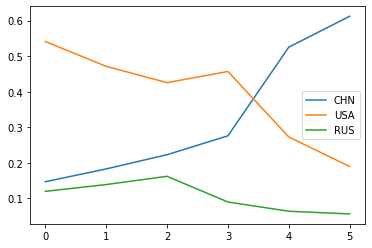

In [18]:
%matplotlib inline
from lapl import laplacian_centrality
books=[G1,G80, G, G00,G10,G2]
# Creating a list of degree centrality of all the books
evol = [laplacian_centrality(book, weight='weight') for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['CHN', 'USA', 'RUS']].plot()

<AxesSubplot:>

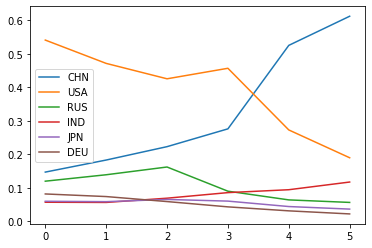

In [29]:
degree_evol_df[['CHN', 'USA', 'RUS','IND', 'JPN', 'DEU']].plot()

<AxesSubplot:>

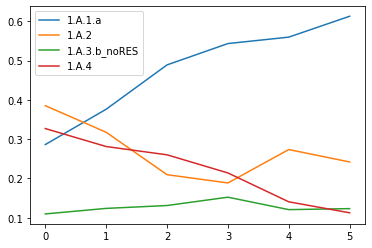

In [58]:
degree_evol_df[['1.A.1.a','1.A.2','1.A.3.b_noRES', '1.A.4']].plot() 	


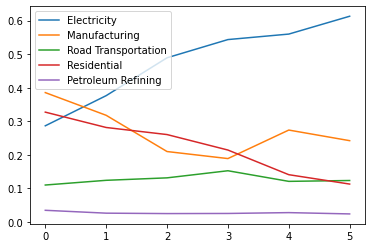

In [63]:
plt=degree_evol_df[['1.A.1.a','1.A.2','1.A.3.b_noRES', '1.A.4','1.A.1.bc']].plot() 		
L=plt.legend()
L.get_texts()[0].set_text('Electricity')
L.get_texts()[1].set_text('Manufacturing')
L.get_texts()[2].set_text('Road Transportation')
L.get_texts()[3].set_text('Residential')
L.get_texts()[4].set_text('Petroleum Refining')



In [ ]:
degree_evol_df[['1.A.1.a','1.A.2','1.A.3.b_noRES', '1.A.4']].plot() 	

<AxesSubplot:>

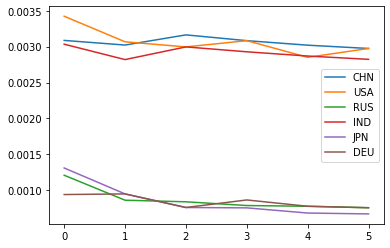

In [40]:
from lapl import laplacian_centrality
from networkx import bipartite
books=[G1,G80, G, G00,G10,G2]
# Creating a list of degree centrality of all the books
evol_deg = [nx.bipartite.betweenness_centrality(book, [x for x,y in book.nodes(data=True) if y['bipartite']==0] ) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol_deg)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['CHN', 'USA', 'RUS','IND', 'JPN', 'DEU']].plot()